In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib
from pylab import *
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('apparel-trainval.csv')
# dataset

In [8]:
X = dataset.drop('label', axis = 1)
Y = dataset['label']

In [9]:
X = (X - np.mean(X))/np.std(X)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
X_train = X_train.iloc[:]
Y_train=pd.concat([Y_train,pd.get_dummies(Y_train,prefix='label')],axis=1).drop(['label'],axis=1)
Y_train = Y_train.iloc[:]

In [12]:
epoch_error = []

In [13]:
class Neural_network(object):
    
    def __init__(self):
        self.input_layer_size = 784
        self.output_layer_size = 10
        self.hidden_layer_size = 70
        self.hidden_layers = 2
        self.weights = {}
        self.dweights = {}
        self.Z = {}
        self.a = {}
        self.Y_hat = np.array([])
        self.delta = {}
        self.epoch = 500
        self.ita = 0.01
        
    def initialization(self):
        
        self.weights[1] = np.random.randn(self.input_layer_size,self.hidden_layer_size)
        self.weights[self.hidden_layers+1] = np.random.randn(self.hidden_layer_size,self.output_layer_size)
        
        for i in np.arange(2,self.hidden_layers+1):
            self.weights[i] = np.random.randn(self.hidden_layer_size,self.hidden_layer_size)
            
    
    def softmax(self,a):
        tsum = np.sum(a,axis = 1,keepdims = True)
        soft_a = np.divide(a,tsum)
        return soft_a
    
#     def y_prep(self,Y,k):
#          # Onehot
#         y = np.zeros((len(Y),self.output_layer_size))
#         for i in range(y.shape[0]):
#             y[i][Y[i]] = 1
#         return y
    
    
    def error(self,y):
        return sum(0.5*np.sum((y-self.Y_hat)*(y-self.Y_hat),axis = 1))
    
    def derivative_sigmoid(self,layer):
        derivative = layer*(1-layer)
        return derivative
    
   
    def deltas(self,y):
        w = self.a[self.hidden_layers+2]
        self.delta[self.hidden_layers+2] = -(y - self.Y_hat)*self.derivative_sigmoid(w)
        self.dweights[self.hidden_layers+1] = np.dot(self.a[self.hidden_layers+1].T , (self.delta[self.hidden_layers+2]))
        
        for i in np.arange(self.hidden_layers+1,1,-1):
            self.delta[i] = ( np.dot(self.delta[i+1], self.weights[i].T))*self.derivative_sigmoid(self.a[i])
            self.dweights[i-1] = np.dot(self.a[i-1].T , (self.delta[i]))  
    
    def sigmoid(self,x):
        x = -x
        return 1 / (1 + np.exp(x))
    
    
    
    def forward_propagation(self, X):
        self.a[1]=np.array(X)
        

        for i in range(1,self.hidden_layers+2):
            self.Z[i+1] = np.dot(self.a[i],self.weights[i])
            self.a[i+1] = self.sigmoid(self.Z[i+1])
        self.Y_hat = self.softmax(self.a[self.hidden_layers+2])
        
   
    def gradient_descent(self,X_train,Y_train):
        k = 0
        while k<=900:
#             X=X_train.iloc[k:k+1000]
#             Y=Y_train.iloc[k:k+1000]
            X = X_train[k:k+3000]
            y = Y_train[k:k+3000]
#             print(y)
            for i in range(self.epoch):
                self.forward_propagation(X)
                epoch_error.append(self.error(y))
#                 y = self.y_prep(Y,k)
                print("Error : ",self.error(y))
                    
                self.deltas(y)
                for j in range(1,self.hidden_layers+2):
                    self.weights[j] = self.weights[j] - self.ita*self.dweights[j]
            print("Final Error : ",self.error(y))
            k = k + 10000
        
            

k = Neural_network()
k.initialization()
#k.forward_propagation(X_train)
k.gradient_descent(X_train,Y_train)


Error :  1567.4311582436317
Error :  1522.5049657673721
Error :  1574.5321478058297
Error :  1527.6827234759753
Error :  1472.5584928373378
Error :  1479.0083704481835
Error :  1384.3225872453954
Error :  1412.342560270597
Error :  1696.4598325060088
Error :  1749.9064323796506
Error :  1652.708245054922
Error :  1636.9247483732204
Error :  1625.9429820015357
Error :  1617.529254215494
Error :  1610.717635924419
Error :  1605.0153753421266
Error :  1600.1352565702332
Error :  1595.8871856330725
Error :  1592.1168063006282
Error :  1588.6921966182017
Error :  1585.5319660325008
Error :  1582.5932188278248
Error :  1579.8468317935838
Error :  1577.2691330032915
Error :  1574.8399892420425
Error :  1572.542141344697
Error :  1570.3608232837287
Error :  1568.283529274268
Error :  1566.2998705503344
Error :  1564.4014203080483
Error :  1562.5814425632848
Error :  1560.8344912294133
Error :  1559.1559781049984
Error :  1557.5418291362046
Error :  1555.9882779502864
Error :  1554.491773612288

Error :  1497.5817502979287
Error :  1497.418917991843
Error :  1497.2587582921994
Error :  1497.1014188256083
Error :  1496.9470327174254
Error :  1496.7957123510796
Error :  1496.6475413045098
Error :  1496.5025641667316
Error :  1496.3607741827075
Error :  1496.2220991373385
Error :  1496.086386616116
Error :  1495.9533907415353
Error :  1495.8227634984605
Error :  1495.6940544328409
Error :  1495.5667222707355
Error :  1495.4401603571941
Error :  1495.3137347302018
Error :  1495.1868299128075
Error :  1495.0588946152045
Error :  1494.929478934954
Error :  1494.798256786839
Error :  1494.6650312789939
Error :  1494.5297248721843
Error :  1494.3923589380697
Error :  1494.2530282117013
Error :  1494.111874949503
Error :  1493.9690661116133
Error :  1493.8247752876343
Error :  1493.6791697969543
Error :  1493.5324025567488
Error :  1493.3846078820754
Error :  1493.235900250565
Error :  1493.0863751125871
Error :  1492.936110965594
Error :  1492.7851720790911
Error :  1492.6336114203102

Text(0.5, 1.0, 'Epoch vs Error')

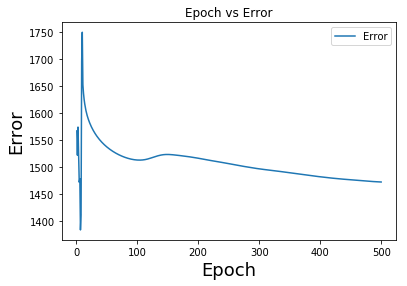

In [15]:
fig, ax = plt.subplots()
x_axis = [i for i in range(1,501,1)]
ax.plot(x_axis, epoch_error, label="Error")
ax.legend(loc=1)
ax.set_xlabel("Epoch", fontsize=18)
ax.set_ylabel("Error", fontsize=18)
ax.set_title('Epoch vs Error')